<a href="https://colab.research.google.com/github/mehdi-lamrani/tensor-flow/blob/main/Linear_Regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression with tensorflow**

In [5]:
from __future__ import absolute_import, division, print_function

In [6]:
import tensorflow as tf
import numpy as np
rng = np.random

Définissons nos paramètres :

In [7]:
learning_rate = 0.01
training_steps = 1000
display_step = 50


Training Data

In [8]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

Weight and Bias, initialisés de manière aléatoire.

In [9]:
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Linear regression (Wx + b)

In [10]:
def linear_regression(x):
    return W * x + b

Mean square error

In [11]:
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))


Stochastic Gradient Descent Optimizer

In [12]:
optimizer = tf.optimizers.SGD(learning_rate)

Optimization process. 

In [13]:
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

Run training for the given number of steps

In [14]:
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.233418, W: 0.138558, b: 1.600466
step: 100, loss: 0.216251, W: 0.151498, b: 1.508726
step: 150, loss: 0.202788, W: 0.162957, b: 1.427486
step: 200, loss: 0.192230, W: 0.173105, b: 1.355541
step: 250, loss: 0.183950, W: 0.182092, b: 1.291830
step: 300, loss: 0.177457, W: 0.190050, b: 1.235410
step: 350, loss: 0.172365, W: 0.197098, b: 1.185447
step: 400, loss: 0.168371, W: 0.203339, b: 1.141200
step: 450, loss: 0.165240, W: 0.208865, b: 1.102017
step: 500, loss: 0.162784, W: 0.213760, b: 1.067318
step: 550, loss: 0.160858, W: 0.218094, b: 1.036590
step: 600, loss: 0.159347, W: 0.221932, b: 1.009378
step: 650, loss: 0.158163, W: 0.225332, b: 0.985281
step: 700, loss: 0.157234, W: 0.228342, b: 0.963941
step: 750, loss: 0.156505, W: 0.231007, b: 0.945043
step: 800, loss: 0.155934, W: 0.233368, b: 0.928308
step: 850, loss: 0.155486, W: 0.235458, b: 0.913487
step: 900, loss: 0.155135, W: 0.237309, b: 0.900363
step: 950, loss: 0.154859, W: 0.238949, b: 0.888741
step: 1000, l

In [15]:
import matplotlib.pyplot as plt

Graphic display

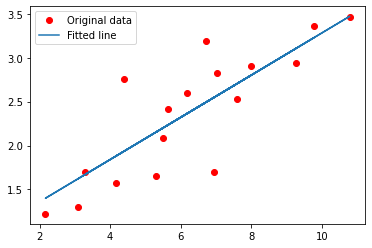

In [16]:
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()